<a href="https://colab.research.google.com/github/NarenneraN/Machine_Learning/blob/main/K_MEANS/kmeans_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


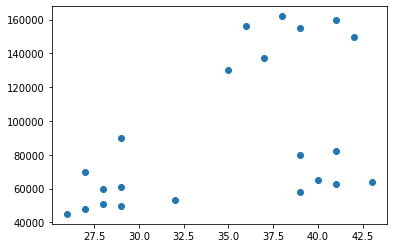

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [6]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


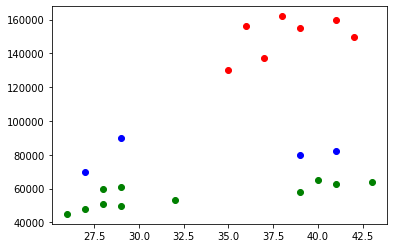

In [12]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

In [13]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

We can see above centroids have been in wrong place , so we need to scale it and then apply kmeans

In [27]:
print(df[1:2])
print(df[['Age']])

      Name  Age  Income($)  cluster
1  Michael   29      90000        2
    Age
0    27
1    29
2    29
3    28
4    42
5    39
6    41
7    38
8    36
9    35
10   37
11   26
12   27
13   28
14   29
15   32
16   40
17   41
18   43
19   39
20   41
21   39


In [35]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit()

from sklearn.preprocessing import MinMaxScaler
 
# create data
# data = [[11, 2,6], [3, 7,2], [0, 10,11], [11, 8,4]]
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(df[['Age']])
df['Age']=model.transform(df[['Age']])
model=scaler.fit(df[['Income($)']])
df['Income($)']=model.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [45]:
df.drop(df.iloc[:,3:],axis=1,inplace=True)
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [46]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [47]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [48]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


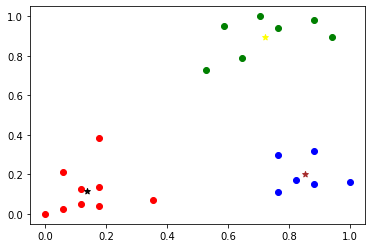

In [58]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],color='yellow',marker='*')
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],color='black',marker='*')
plt.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1],color='brown',marker='*')

In [50]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

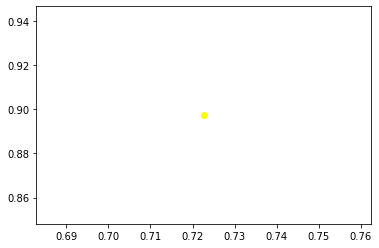

In [52]:
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],color='yellow')

In [61]:
k_rng=range(1,10)
sse=[]
for i in k_rng:
  km = KMeans(n_clusters=i)
  y_predicted = km.fit_predict(df[['Age','Income($)']])
  sse.append(km.inertia_)
print(sse)

[5.434011511988176, 2.091136388699076, 0.4750783498553094, 0.34910470944195643, 0.2766936276300278, 0.2105547899547249, 0.17681044133887713, 0.14072448985352304, 0.1099581688308657]


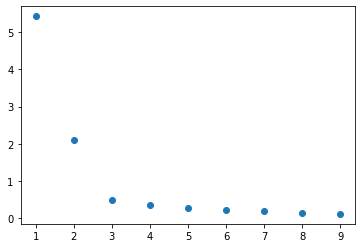

In [63]:
plt.scatter(k_rng,sse)